# Data Science Jobs Analyze


Group:
* Anchal
* Angela
* Larissa
* Fabio
* Felipe

This program read information coming from the data frame "df_jobs" generated by the "Data Science Jobs Analyze - Web Scraping" script and provides some analysis about the main caracteristics of Data Science Job opportunities in Toronto.

In [245]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_jobs = pd.read_excel('output/df_jobs_out.xlsx')

In [246]:
# Starting the Analysis  

# Checking how many records we are missing:
df_jobs.isnull().sum()

Province        0
City            0
Job_ID          0
JobTitle_x      0
Position        0
CompanyName     0
JobType         0
Salary          0
KeyWord         0
Skill           0
Category        0
InUoTProgram    0
dtype: int64

In [247]:
# looking at the descriptive statistics for the dataframe:
df_jobs.describe(include='all')

,Province,City,Job_ID,JobTitle_x,Position,CompanyName,JobType,Salary,KeyWord,Skill,Category,InUoTProgram
count,4685,4685,4685,4685,4685,4685,4685,4685,4685,4685,4685,4685
unique,13,99,984,1,805,552,10,68,67,52,6,2
top,ON,Toronto,d01e01ae79264266,Data Scientist,Data Scientist,Amazon.com,Not Informed,Not Informed,Excel,Excel,Hard,NO
freq,2296,1480,21,4685,466,79,4017,4378,410,410,2809,2914


In [273]:
# df_jobs.head(50)

In [249]:
# Job opportunities analyzed
len(df_jobs.groupby(['Job_ID']).size())

984

In [250]:
df_lat_long = pd.read_excel('Lat_Log_city_prov_Canada.xlsx')
df_lat_long.columns

Index(['City_Province', 'Lat ', 'Long'], dtype='object')

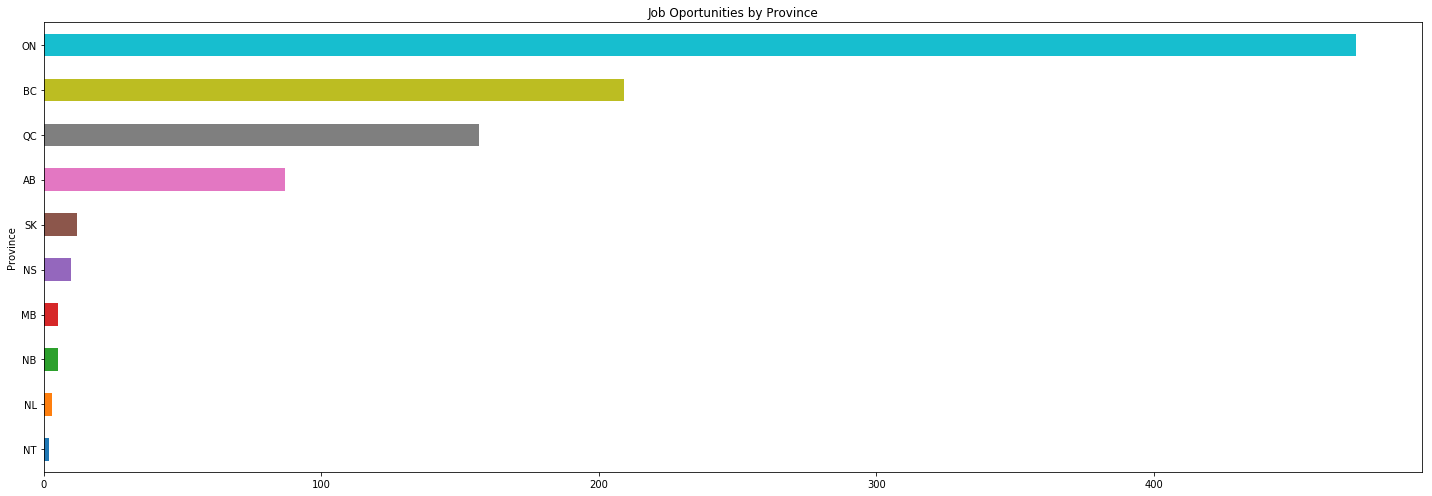

In [257]:
# Data Science job opportunities by Province
df_provinces = df_jobs.loc [(df_jobs['Province'] != 'Not Informed')]
df_province_jobs = df_provinces.groupby(['Province','Job_ID']).size().reset_index().groupby('Province').size().sort_values(ascending=False)
df_province_jobs = df_province_jobs.head(10)
df_province_jobs = df_province_jobs.sort_values(ascending=True)
df_province_jobs.plot(kind='barh', stacked=False, rot = 0, figsize=(20, 7), title = 'Job Oportunities by Province');

plt.tight_layout()

plt.savefig('Graphs/Jobs_by_province.png')

# data_set = pd.DataFrame (df_province_jobs)
# data_set.columns=['Value']
# # data_set
# data_set_crossed_lat_log = data_set.merge(df_lat_long, how='left', left_on='Province', right_on='City_Province')
# data_set_crossed_lat_log ['Value'].astype(float)
# data_set_crossed_lat_log

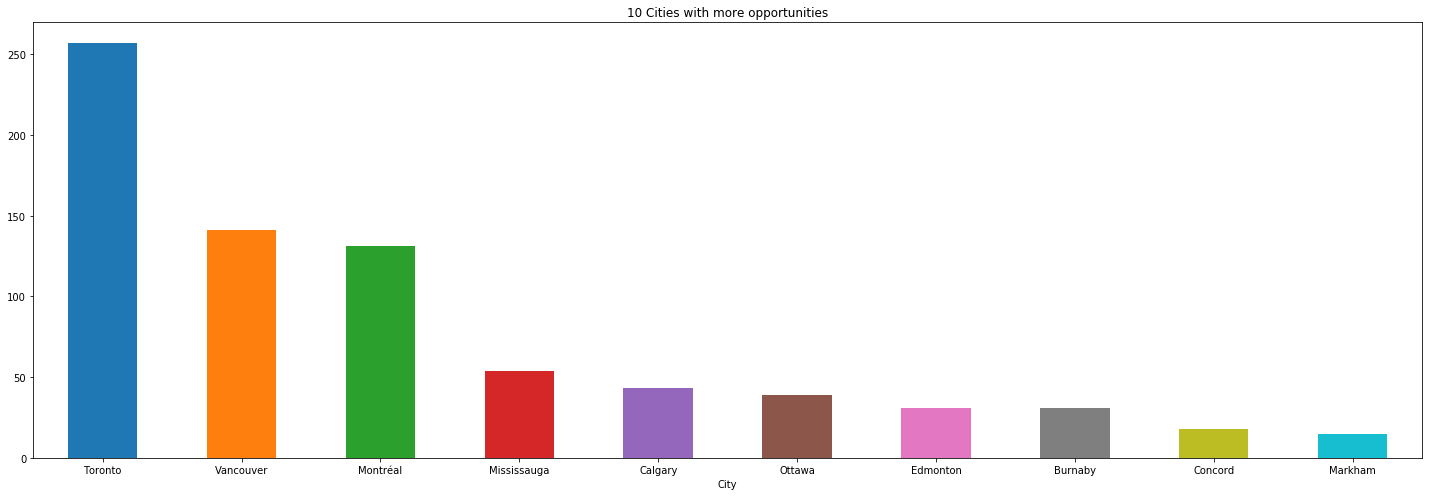

In [258]:
# 10 Cities with more opportunities

df_city_jobs = df_jobs.groupby(['City','Job_ID']).size().reset_index().groupby('City').size().sort_values(ascending=False)
df_city_jobs = df_city_jobs.head(10)
df_city_jobs.plot(kind='bar', stacked=False, rot = 0, figsize=(20, 7), title = '10 Cities with more opportunities');
plt.tight_layout()

plt.savefig('Graphs/Jobs_per_city.png')

In [8]:
# Top 3 Cities by Province
#Ontario
df_jobs_ON = df_jobs.loc [df_jobs['Province'] == 'ON']
df_city_jobs_ON = df_jobs_ON.groupby(['City','Job_ID']).size().reset_index().groupby('City').size().sort_values(ascending=False)

#British Columbia
df_jobs_BC = df_jobs.loc [df_jobs['Province'] == 'BC']
df_city_jobs_BC = df_jobs_BC.groupby(['City','Job_ID']).size().reset_index().groupby('City').size().sort_values(ascending=False)

#Alberta
df_jobs_AB = df_jobs.loc [df_jobs['Province'] == 'AB']
df_city_jobs_AB = df_jobs_AB.groupby(['City','Job_ID']).size().reset_index().groupby('City').size().sort_values(ascending=False)

#Quebec
df_jobs_QC = df_jobs.loc [df_jobs['Province'] == 'QC']
df_city_jobs_QC = df_jobs_QC.groupby(['City','Job_ID']).size().reset_index().groupby('City').size().sort_values(ascending=False)

#Saskatwan 
df_jobs_SK = df_jobs.loc [df_jobs['Province'] == 'SK']
df_city_jobs_SK = df_jobs_SK.groupby(['City','Job_ID']).size().reset_index().groupby('City').size().sort_values(ascending=False)

#Nova Scottia 
df_jobs_NS = df_jobs.loc [df_jobs['Province'] == 'NS']
df_city_jobs_NS = df_jobs_NS.groupby(['City','Job_ID']).size().reset_index().groupby('City').size().sort_values(ascending=False)

#Manitoba 
df_jobs_MB = df_jobs.loc [df_jobs['Province'] == 'MB']
df_city_jobs_MB = df_jobs_MB.groupby(['City','Job_ID']).size().reset_index().groupby('City').size().sort_values(ascending=False)


#New Brunswick 
df_jobs_NB = df_jobs.loc [df_jobs['Province'] == 'NB']
df_city_jobs_NB = df_jobs_NB.groupby(['City','Job_ID']).size().reset_index().groupby('City').size().sort_values(ascending=False)


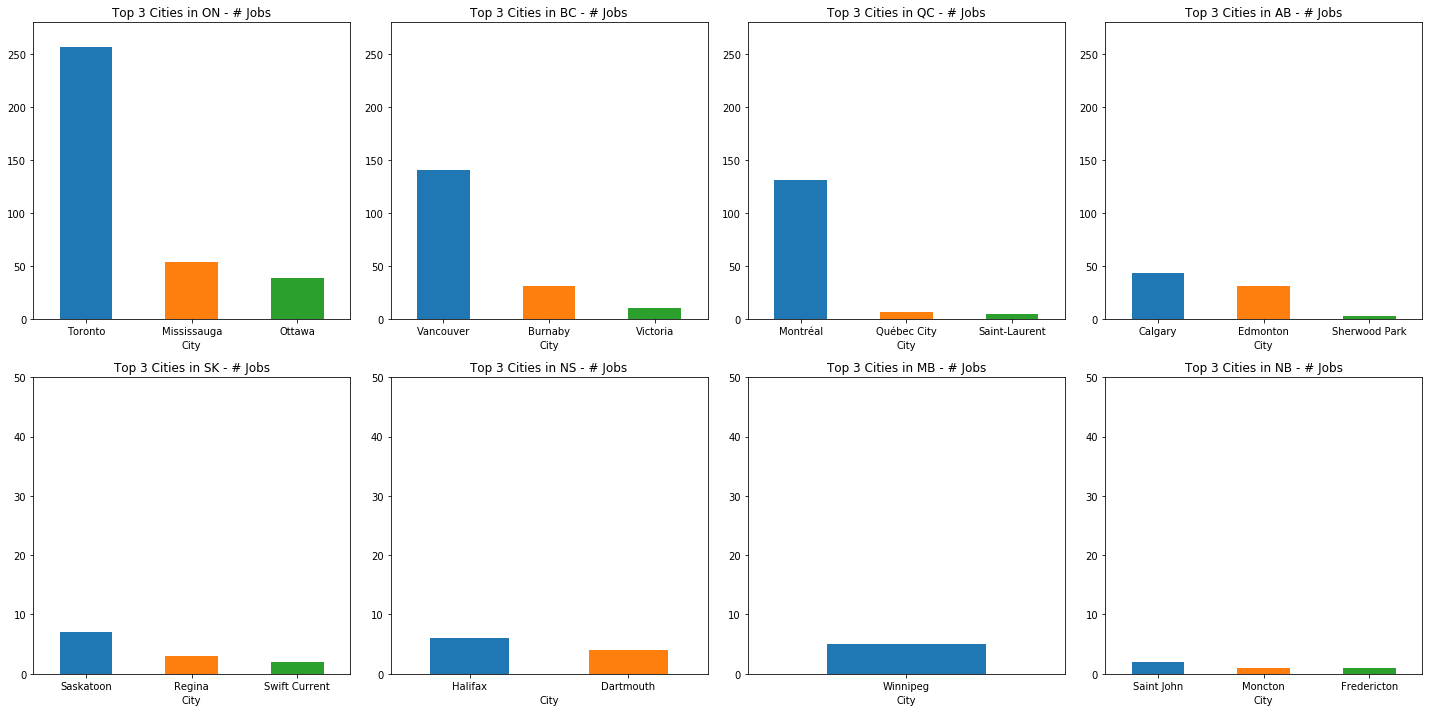

In [64]:
# Top 3 Cities by Province
fig = plt.figure()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig.add_subplot(2,4,1)
df_city_jobs_ON.head(3).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 10))
plt.title('Top 3 Cities in ON - # Jobs')
plt.ylim((0,280))

fig.add_subplot(2,4,2)
df_city_jobs_BC.head(3).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 10))
plt.title('Top 3 Cities in BC - # Jobs')
plt.ylim((0,280))


fig.add_subplot(2,4,3)
df_city_jobs_QC.head(3).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 10))
plt.title('Top 3 Cities in QC - # Jobs')
plt.ylim((0,280))


fig.add_subplot(2,4,4)
df_city_jobs_AB.head(3).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 10))
plt.title('Top 3 Cities in AB - # Jobs')
plt.ylim((0,280))


fig.add_subplot(2,4,5)
plt.subplots_adjust(left=None, bottom=None, right=None, top=2.5, wspace=None, hspace=None)
df_city_jobs_SK.head(3).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 10))
plt.title('Top 3 Cities in SK - # Jobs')
plt.ylim((0,50))


fig.add_subplot(2,4,6)
plt.subplots_adjust(left=None, bottom=None, right=None, top=2.5, wspace=None, hspace=None)
df_city_jobs_NS.head(3).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 10))
plt.title('Top 3 Cities in NS - # Jobs')
plt.ylim((0,50))


fig.add_subplot(2,4,7)
plt.subplots_adjust(left=None, bottom=None, right=None, top=2.5, wspace=None, hspace=None)
df_city_jobs_MB.head(3).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 10))
plt.title('Top 3 Cities in MB - # Jobs')
plt.ylim((0,50))


fig.add_subplot(2,4,8)
plt.subplots_adjust(left=None, bottom=None, right=None, top=2.5, wspace=None, hspace=None)
df_city_jobs_NB.head(3).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 10))
plt.title('Top 3 Cities in NB - # Jobs')
plt.ylim((0,50))

plt.tight_layout()

fig.savefig('Graphs/Top_3_cities_by_province.png')



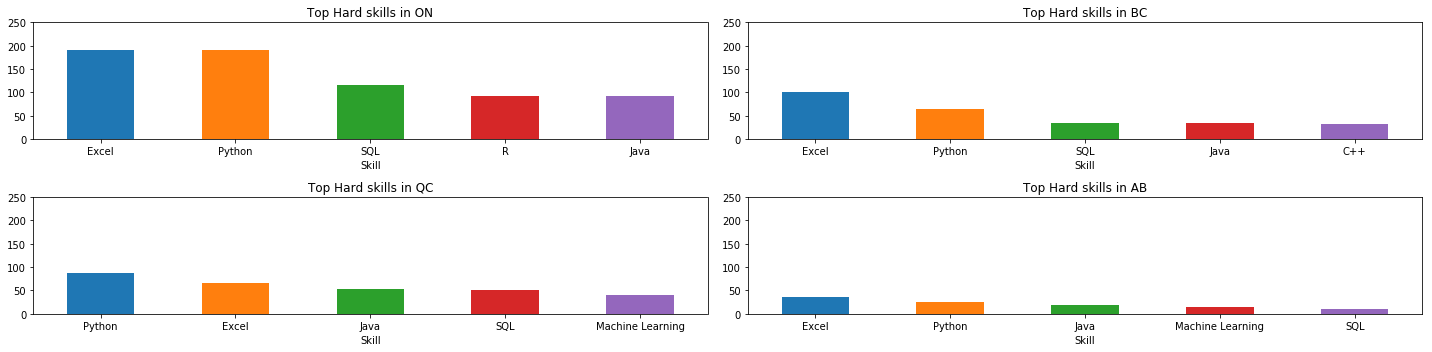

In [71]:
# Top 3 required Data Science Hard skills by the main provinces. E.g Toronto X Vancouver 

#Ontario
df_skills_ON = df_jobs.loc [(df_jobs['Province'] == 'ON') & (df_jobs['Category'] == 'Hard')]
df_city_skills_ON = df_skills_ON.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)


#British Columbia
df_skills_BC = df_jobs.loc [(df_jobs['Province'] == 'BC') & (df_jobs['Category'] == 'Hard')]
df_city_skills_BC = df_skills_BC.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)


#Quebec
df_skills_QC = df_jobs.loc [(df_jobs['Province'] == 'QC') & (df_jobs['Category'] == 'Hard')]
df_city_skills_QC = df_skills_QC.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)


#Alberta
df_skills_AB = df_jobs.loc [(df_jobs['Province'] == 'AB') & (df_jobs['Category'] == 'Hard')]
df_city_skills_AB = df_skills_AB.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)



# Top 3 required Data Science skills by the main provinces. E.g Toronto X Vancouver - Plots
plt.figure()
plt.subplot(2,2,1)
df_city_skills_ON.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Hard skills in ON')
plt.ylim((0,250))

plt.subplot(2,2,2)
df_city_skills_BC.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Hard skills in BC')
plt.ylim((0,250))

plt.subplot(2,2,3)
df_city_skills_QC.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Hard skills in QC')
plt.ylim((0,250))

plt.subplot(2,2,4)
df_city_skills_AB.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Hard skills in AB')
plt.ylim((0,250))
plt.tight_layout()


plt.savefig('Graphs/Hard_skills_by_province.png')

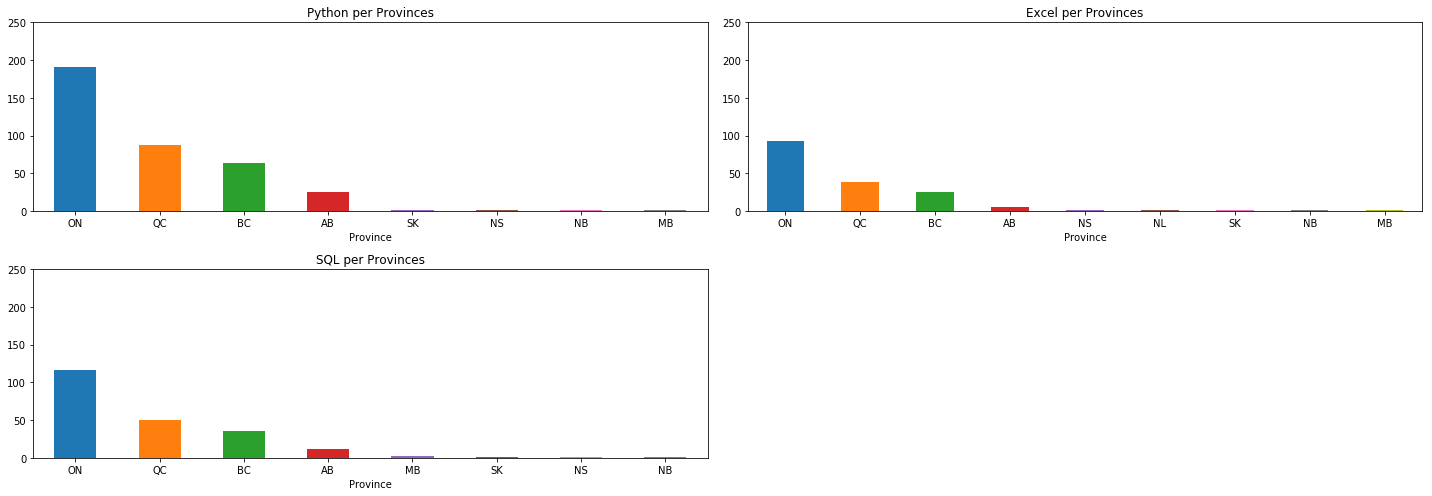

In [148]:
#Python
df_skills_python = df_jobs.loc [(df_jobs['Province'] != 'Not Informed') & (df_jobs['Skill'] == 'Python')]
df_city_skills_python = df_skills_python.groupby(['Province','Job_ID']).size().reset_index().groupby('Province').size().sort_values(ascending=False)
df_city_skills_python

#R
df_skills_R = df_jobs.loc [(df_jobs['Province'] != 'Not Informed') & (df_jobs['Skill'] == 'R')]
df_city_skills_R = df_skills_R.groupby(['Province','Job_ID']).size().reset_index().groupby('Province').size().sort_values(ascending=False)
df_city_skills_excel

#SQL
df_skills_SQL = df_jobs.loc [(df_jobs['Province'] != 'Not Informed') & (df_jobs['Skill'] == 'SQL')]
df_city_skills_SQL = df_skills_SQL.groupby(['Province','Job_ID']).size().reset_index().groupby('Province').size().sort_values(ascending=False)
df_city_skills_SQL


# Skills per province
plt.figure()
plt.subplot(2,2,1)
df_city_skills_python.plot(kind='bar', stacked=False, rot = 0, figsize=(20, 7))
plt.title('Python per Provinces')
Province_order = ["ON", "QC", "BC", "AB", "SK", "NS", "NB", "MB"]
plt.ylim((0,250))

plt.subplot(2,2,2)
df_city_skills_excel.plot(kind='bar',stacked=False, rot = 0, figsize=(20, 7))
plt.title('Excel per Provinces')
Province_order = ["ON", "QC", "BC", "AB", "SK", "NS", "NB", "MB"]
plt.ylim((0,250))

plt.subplot(2,2,3)
df_city_skills_SQL.plot(kind='bar',stacked=False, rot = 0, figsize=(20, 7))
plt.title('SQL per Provinces')
plt.ylim((0,250))
plt.tight_layout()


plt.savefig('Graphs/Skills_per_province.png')

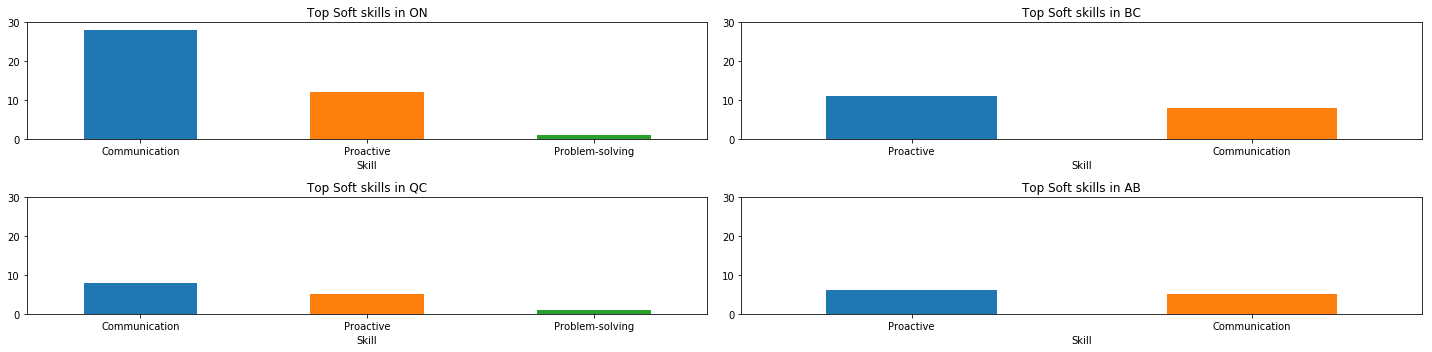

In [70]:
# Top 3 required Data Science Soft skills by the main provinces. E.g Toronto X Vancouver 

#Ontario
df_skills_ON = df_jobs.loc [(df_jobs['Province'] == 'ON') & (df_jobs['Category'] == 'Soft')]
df_city_skills_ON = df_skills_ON.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)


#British Columbia
df_skills_BC = df_jobs.loc [(df_jobs['Province'] == 'BC') & (df_jobs['Category'] == 'Soft')]
df_city_skills_BC = df_skills_BC.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)


#Quebec
df_skills_QC = df_jobs.loc [(df_jobs['Province'] == 'QC') & (df_jobs['Category'] == 'Soft')]
df_city_skills_QC = df_skills_QC.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)

#Alberta
df_skills_AB = df_jobs.loc [(df_jobs['Province'] == 'AB') & (df_jobs['Category'] == 'Soft')]
df_city_skills_AB = df_skills_AB.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)


# Top 3 required Data Science skills by the main provinces. E.g Toronto X Vancouver - Plots

plt.figure()
plt.subplot(2,2,1)
df_city_skills_ON.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Soft skills in ON')
plt.ylim((0,30))

plt.subplot(2,2,2)
df_city_skills_BC.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Soft skills in BC')
plt.ylim((0,30))

plt.subplot(2,2,3)
df_city_skills_QC.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Soft skills in QC')
plt.ylim((0,30))

plt.subplot(2,2,4)
df_city_skills_AB.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Soft skills in AB')
plt.ylim((0,30))

plt.tight_layout()
plt.savefig('Graphs/Soft_skills_by_province.png')

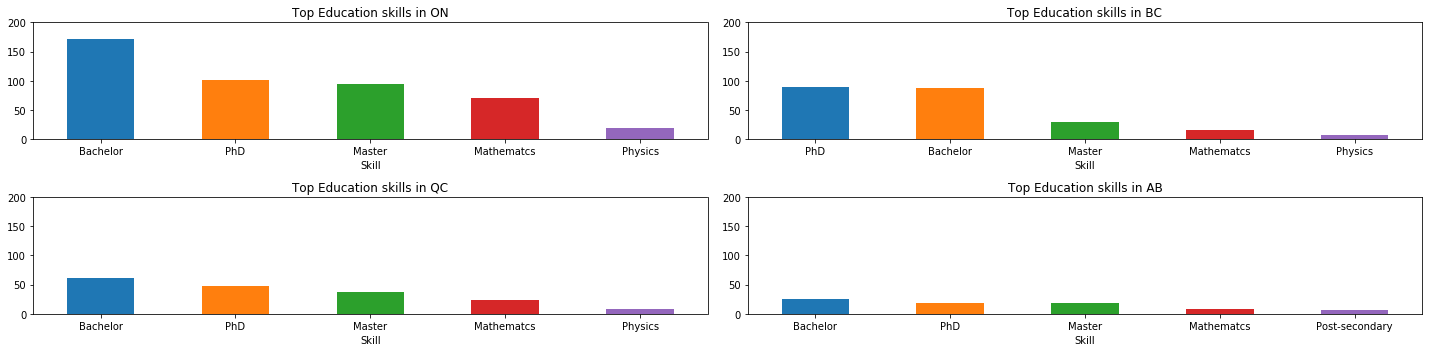

In [76]:
#Ontario
df_Education_ON = df_jobs.loc [(df_jobs['Province'] == 'ON') & (df_jobs['Category'] == 'Education')]
df_city_education_ON = df_Education_ON.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)

#British Clumbia
df_Education_BC = df_jobs.loc [(df_jobs['Province'] == 'BC') & (df_jobs['Category'] == 'Education')]
df_city_education_BC= df_Education_BC.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)


#Quebec
df_Education_QC = df_jobs.loc [(df_jobs['Province'] == 'QC') & (df_jobs['Category'] == 'Education')]
df_city_education_QC = df_Education_QC.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)


#Alberta
df_Education_AB = df_jobs.loc [(df_jobs['Province'] == 'AB') & (df_jobs['Category'] == 'Education')]
df_city_education_AB = df_Education_AB.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)


# Top 3 required Data Science skills by the main provinces. E.g Toronto X Vancouver - Plots

plt.figure()
plt.subplot(2,2,1)
df_city_education_ON.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Education skills in ON')
plt.ylim((0,200))

plt.subplot(2,2,2)
df_city_education_BC.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Education skills in BC')
plt.ylim((0,200))

plt.subplot(2,2,3)
df_city_education_QC.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Education skills in QC')
plt.ylim((0,200))

plt.subplot(2,2,4)
df_city_education_AB.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top Education skills in AB')
plt.ylim((0,200))

plt.tight_layout()
plt.savefig('Graphs/Education_by_province.png')

In [259]:
df_Education = df_jobs.loc [df_jobs['Category'] == 'Education']
df_city_education = df_Education.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)
df_city_education

# for i in df_city_education:
#     print (i)

Skill
Bachelor          363
PhD               275
Master            189
Mathematcs        125
Physics            40
Post-secondary     21
MBA                19
dtype: int64

In [13]:
# Which skills companies are looking for?


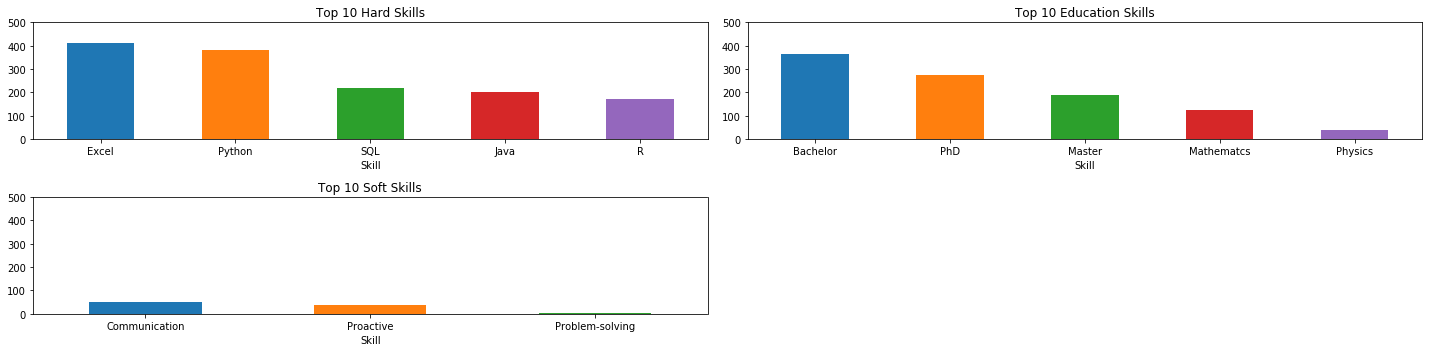

In [272]:
df_Education = df_jobs.loc [df_jobs['Category'] == 'Education']
df_education = df_Education.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)
df_education_1 = df_education.head(10)

df_Hard = df_jobs.loc [df_jobs['Category'] == 'Hard']
df_Hard = df_Hard.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)
df_Hard_1 = df_Hard.head(10)

df_soft = df_jobs.loc [df_jobs['Category'] == 'Soft']
df_soft = df_soft.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)
df_soft_1 = df_soft.head(10)

plt.figure()
plt.subplot(2,2,1)
df_Hard_1.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top 10 Hard Skills')
plt.ylim((0,500))

plt.subplot(2,2,2)
df_education_1.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top 10 Education Skills')
plt.ylim((0,500))

plt.subplot(2,2,3)
df_soft_1.head(5).plot(kind='bar',stacked=False, rot = 0, figsize=(20, 5))
plt.title('Top 10 Soft Skills')
plt.ylim((0,500))

plt.tight_layout()
plt.savefig('Graphs/Skills_in_Canada.png')

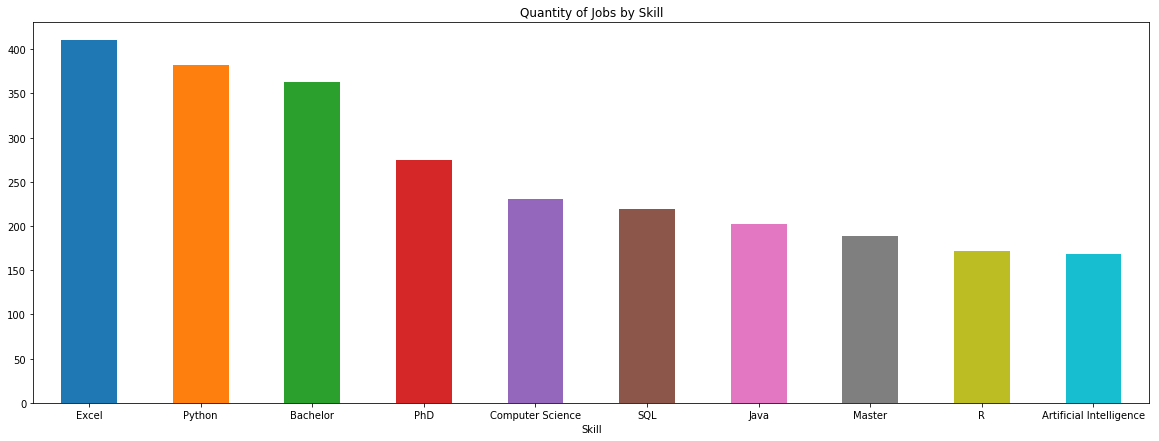

In [14]:
# Top 10 required Data Science skills by Category in Canada

df_skill_jobs = df_jobs.groupby(['Skill','Job_ID']).size().reset_index().groupby('Skill').size().sort_values(ascending=False)
df_skill_jobs = df_skill_jobs.head(10)
df_skill_jobs.plot(kind='bar', stacked=False, rot = 0, figsize=(20 , 7), title = 'Quantity of Jobs by Skill')
# Change this plot by category
# plt.tight_layout()
# plt.savefig('Graphs/U_of_T_Course.png')

In [15]:
# How much will we be paid?

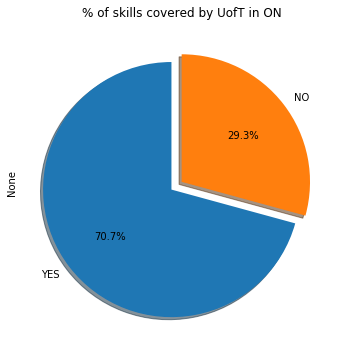

In [276]:
# How Data  Science program  will help us to get a job?

#Ontario
df_UoT_ON = df_jobs.loc [(df_jobs['Province'] == 'ON') & (df_jobs['Category'] == 'Soft')]
# df_UoT_ON_1 = df_UoT_ON.groupby(['InUoTProgram','Job_ID']).size().reset_index().groupby('InUoTProgram').size().sort_values(ascending=False)
df_UoT_ON_1 = df_UoT_ON.groupby(['InUoTProgram']).size().sort_values(ascending=False)
explode = (0.1 , 0)
df_UoT_ON_1.plot(kind='pie', stacked=False, autopct='%1.1f%%', shadow=True, explode=explode, startangle=90, rot = 0, figsize=(5 , 5), title = '% of skills covered by UofT in ON')


plt.tight_layout()
plt.savefig('Graphs/U_of_T_Course.png')

In [17]:
# Python, Big Data, Statistics and AI

In [18]:
# Most popular in the market: Python or R?

In [19]:
# % of job opportunities by skills

# Skills by Job
skills_job = pd.crosstab(df_jobs['Skill'],df_jobs['JobTitle_x'])
skills_job = skills_job.sort_values('Data Scientist',ascending=False)
skills_job = skills_job.head(10)
skills_job
# We can put this plot in %

JobTitle_x,Data Scientist
Skill,
Excel,410
Python,382
Bachelor,363
PhD,275
Computer Science,231
SQL,219
Java,202
Master,189
R,172
